In [1]:
import scanpy as sc
adata = sc.datasets.paul15()

/Users/huidong/anaconda3/envs/env_stream2_dev/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/huidong/anaconda3/envs/env_stream2_dev/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [2]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

In [3]:
import stream2 as st2

/Users/huidong/anaconda3/envs/env_stream2_dev/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
workdir = 'result_stream_plots'
st2.settings.set_workdir(workdir)

Saving results in: result_stream_plots


In [16]:
st2.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [6]:
st2.pp.filter_genes(adata,min_n_cells=3)

Before filtering: 
2730 cells, 3451 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2730 cells, 3451 genes


In [7]:
st2.pp.cal_qc_rna(adata)

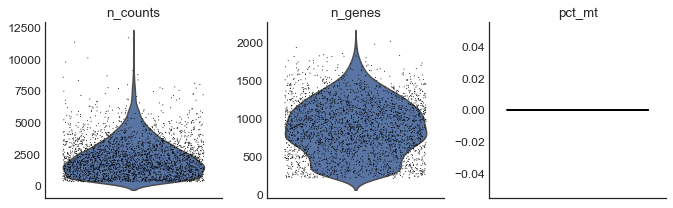

In [8]:
st2.pl.violin(adata,list_obs=['n_counts','n_genes','pct_mt'], fig_size=(3,3))

In [9]:
st2.pp.normalize(adata,method='lib_size')
st2.pp.log_transform(adata)

2000 variable genes are selected.


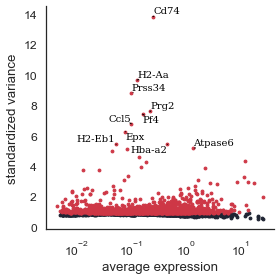

In [10]:
st2.pp.select_variable_genes(adata)
st2.pl.variable_genes(adata,show_texts=True)

the number of selected PC is: 50


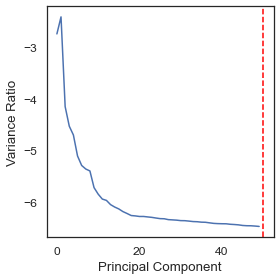

In [11]:
st2.pp.pca(adata,feature='highly_variable', n_components=50)
st2.pl.pca_variance_ratio(adata, log=True)

In [12]:
st2.tl.dimension_reduction(adata,obsm='X_pca',n_dim=40, n_jobs=4)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


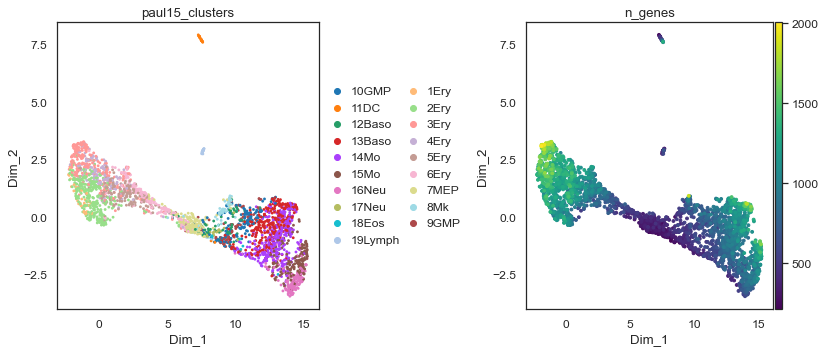

In [13]:
st2.pl.dimension_reduction(adata,color=['paul15_clusters','n_genes'],
                           dict_drawing_order={'paul15_clusters':'random', 'n_genes':'sorted'}, 
                           fig_legend_ncol=2, fig_size=(5.5,5))

In [14]:
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


In [15]:
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

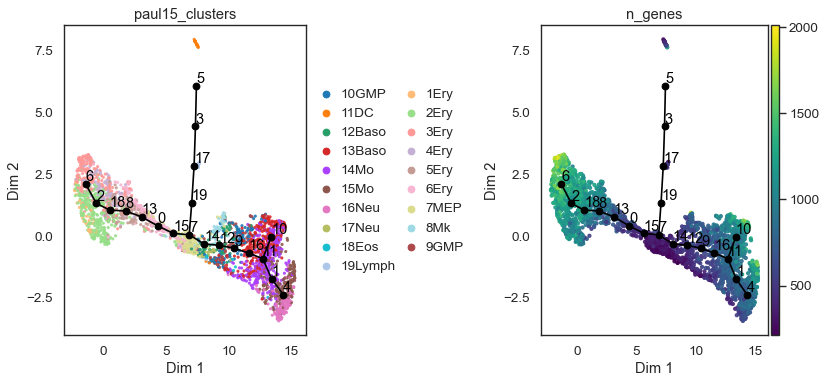

In [17]:
st2.pl.graph(adata, color=['paul15_clusters', 'n_genes'],
             show_text=True, show_node=True,
             fig_legend_ncol=2,)

In the new version of stream plots, the same set of node IDs as in the graph will be used (and therefore no need to keep "flat tree" any more). The cell state ids in STREAM1, e.g., 'S1', 'S2', etc., are removed.

### start from a leaf node   

> for non-numerical variables, the same color palette will be automatically used if detected in adata 

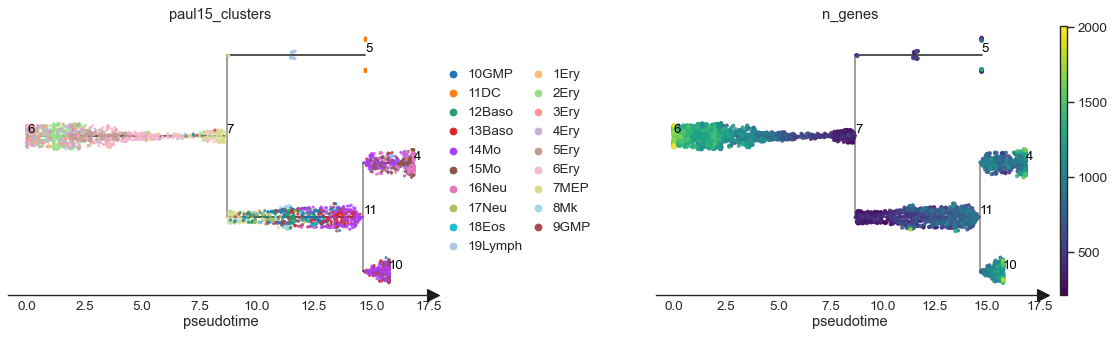

In [18]:
st2.pl.stream_sc(adata, source=6, 
                 dist_scale=0.2, 
                 color=['paul15_clusters', 'n_genes'],
                 fig_ncol=2,
                 fig_legend_ncol=2,
                 save_fig=False)

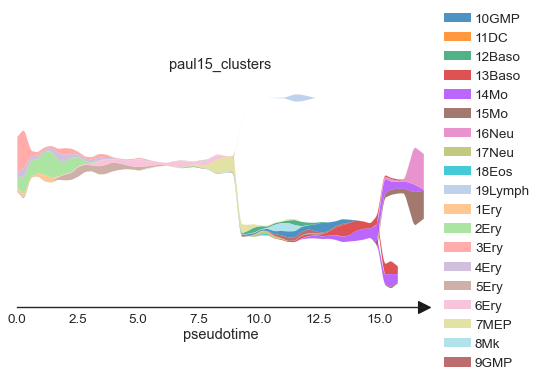

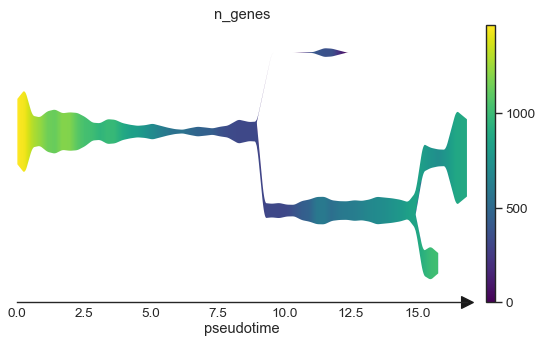

In [19]:
st2.pl.stream(adata, source=6, 
              color=['paul15_clusters', 'n_genes'],
              fig_legend_ncol=1,
              save_fig=False)

> if `color` is not specificed, it will use the default color without showing the title and legend

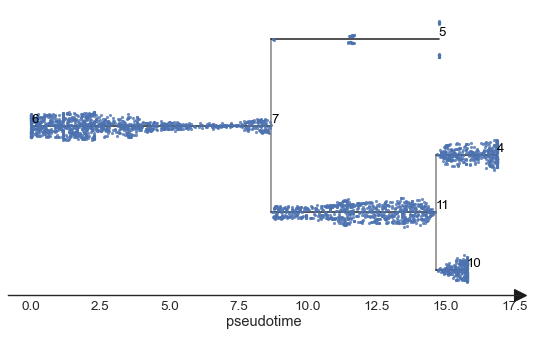

In [20]:
st2.pl.stream_sc(adata, source=6, 
                 dist_scale=0.2,
                 save_fig=False)

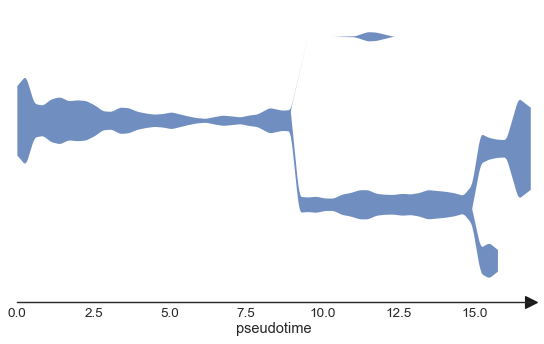

In [21]:
st2.pl.stream(adata, source=6, 
              save_fig=False)

### start from a branching node

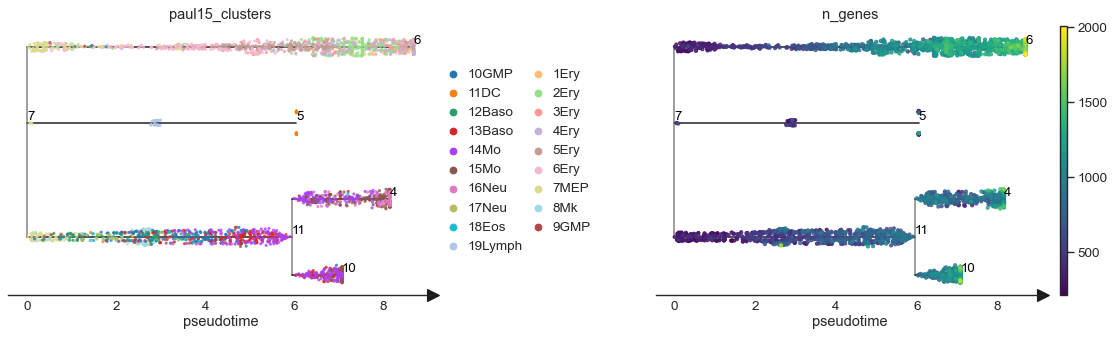

In [22]:
st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['paul15_clusters', 'n_genes'],
                 fig_ncol=2,
                 fig_legend_ncol=2,
                 save_fig=False)

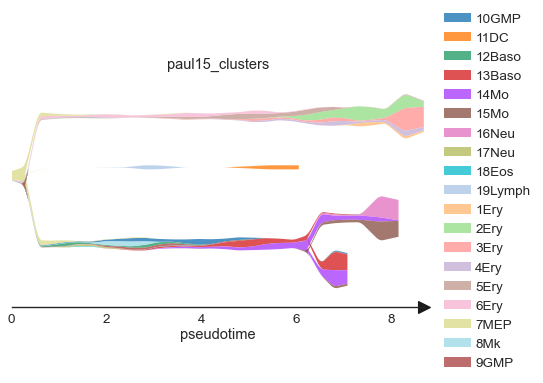

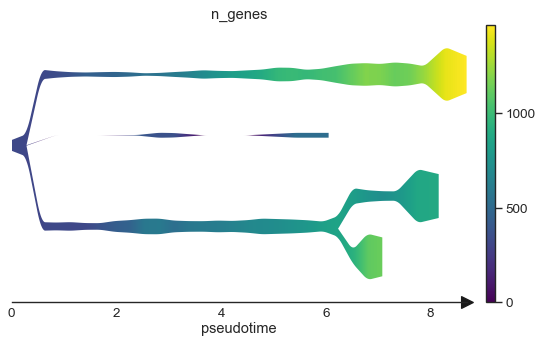

In [23]:
st2.pl.stream(adata, source=7, 
              color=['paul15_clusters', 'n_genes'],
              fig_legend_ncol=1,
              save_fig=False)

### start from any node (such as a connecting node)

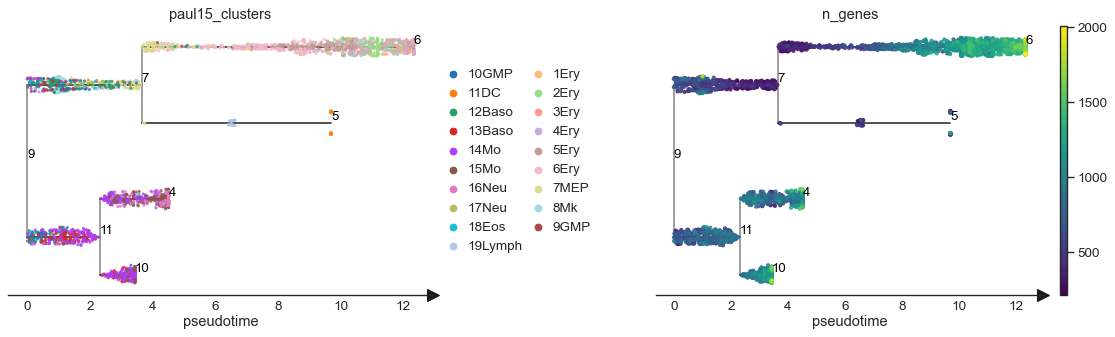

In [24]:
st2.pl.stream_sc(adata, source=9, 
                 dist_scale=0.2, 
                 color=['paul15_clusters', 'n_genes'],
                 fig_ncol=2,
                 fig_legend_ncol=2,
                 save_fig=False)

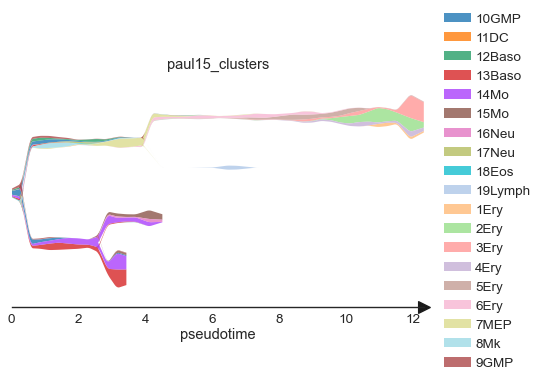

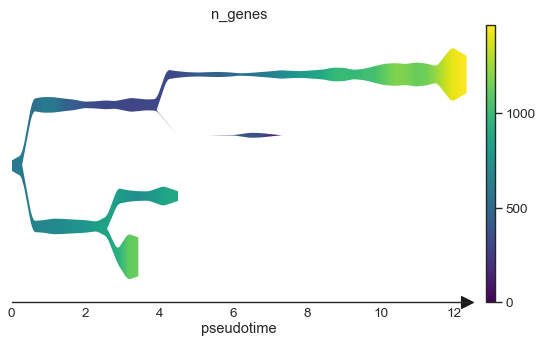

In [25]:
st2.pl.stream(adata, source=9, 
              color=['paul15_clusters', 'n_genes'],
              fig_legend_ncol=1,
              save_fig=False)

> the branches can still be re-arranged by specifiying the parameter 'preference'

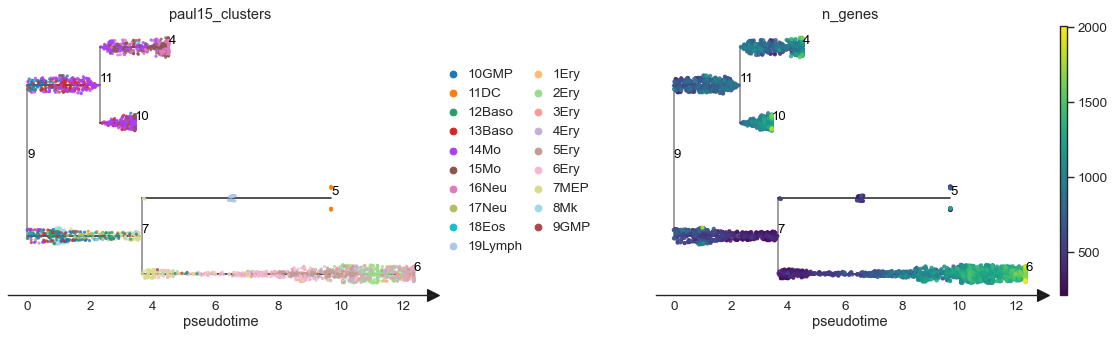

In [26]:
st2.pl.stream_sc(adata, source=9, 
                 dist_scale=0.2, 
                 color=['paul15_clusters', 'n_genes'],
                 preference=[4, 5],
                 fig_ncol=2,
                 fig_legend_ncol=2,
                 save_fig=False)

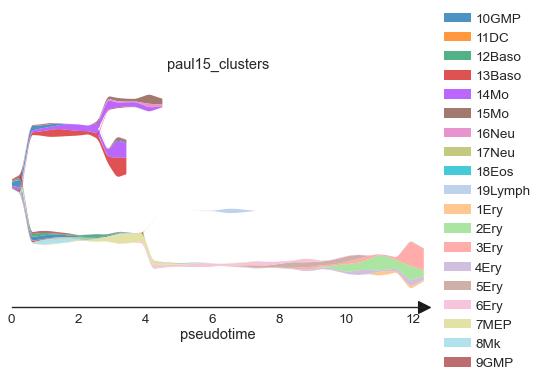

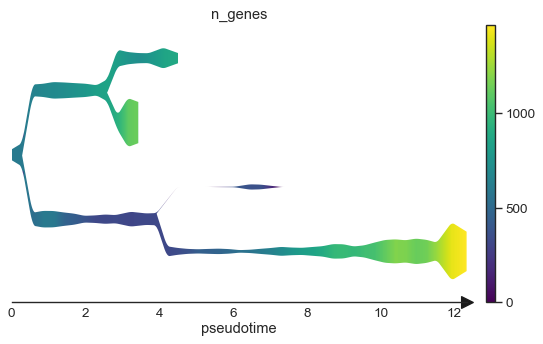

In [27]:
st2.pl.stream(adata, source=9, 
              color=['paul15_clusters', 'n_genes'],
              preference=[4, 5],
              fig_legend_ncol=1,
              save_fig=False)

In [28]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt', 'kmeans', 'seed_epg_node_id', 'seed_epg_node_dist', 'seed_epg_edge_id', 'seed_epg_edge_loc', 'seed_epg_edge_dist', 'epg_node_id', 'epg_node_dist', 'epg_edge_id', 'epg_edge_loc', 'epg_edge_dist'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'iroot', 'pca', 'color', 'seed', 'seed_epg', 'epg', 'stream_tree'
    obsm: 'X_pca', 'X_dr'
    layers: 'raw'

### errors will be reported if it's a non-tree structure

In [29]:
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_circle',)

In [30]:
st2.pl.stream_sc(adata, source=9, 
                 dist_scale=0.2, 
                 color=['paul15_clusters', 'n_genes'],
                 preference=[4, 5],
                 fig_ncol=2,
                 fig_legend_ncol=2,
                 save_fig=False)

AssertionError: `.pl.stream_sc()` only works for a tree structure

In [31]:
st2.pl.stream(adata, source=9, 
              color=['paul15_clusters', 'n_genes'],
              preference=[4, 5],
              fig_legend_ncol=1,
              save_fig=False)

AssertionError: `.pl.stream()` only works for a tree structure